Members:
*   Aquino
*   Lagazo
*   Manlapig
*   Tadeo




#Install and Import Necessary Libraries

In [ ]:
!pip3 install pandas numpy matplotlib seaborn ticker geopandas networkx plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.7 MB/s 
     |████████████████████████████████| 7.8 MB 44.9 MB/s 
     |████████████████████████████████| 16.6 MB 181 kB/s 
  Created wheel for ticker: filename=ticker-0.13-py3-none-any.whl size=3753 sha256=6bb49ab780545929a63bda5525dac6d592c34e60be0cf18cf7577611075d40f4
  Stored in directory: /root/.cache/pip/wheels/0f/30/14/73220698e75e09171bdd3f53915550a8ca00fb16e0355c0a59
Successfully built ticker


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly
import plotly.express as px
import plotly.offline as po
import networkx as nx

#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Taken from https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset
db = pd.read_csv('/content/USA_cars_datasets.csv')
db

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [ ]:
# drop ID column (Unnamed: 0)
db = db.drop('Unnamed: 0', axis=1)
db

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [ ]:
# Check for any NaN values
count_nan = db.isnull().sum()
print(count_nan)

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64


In [ ]:
# Removing data that has a price value of 0 since it would skew our data too hard
db = db[db.price != 0]
db

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [ ]:
db[db.brand == 'ford'].model.unique().size

40

In [ ]:
db[db.brand == 'dodge'].model.unique().size

13

In [ ]:
db[db.brand == 'toyota'].model.unique().size

1

#Temporal

In [ ]:
t_db = db
t_db.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
# Relationship between Price and Brand and Mileage
t_db2 = t_db.groupby(['year', 'price', 'brand']).mean()
# t_db2 = t_db2[['mileage']].reset_index()
t_db2

mileage           lot
year price brand                                 
1973 29800 chevrolet   46226.000000  1.677634e+08
1984 25    ford        41577.000000  1.676117e+08
1994 25    ford       206162.000000  1.673615e+08
1998 25    ford       300021.000000  1.676117e+08
1999 25    jeep       226972.000000  1.672463e+08
...                             ...           ...
2020 45500 chevrolet   13622.333333  1.677660e+08
     46900 ford          740.000000  1.677513e+08
     55600 lexus        8186.000000  1.676057e+08
     59900 ford         2162.000000  1.677630e+08
     61200 bmw          7509.000000  1.674171e+08

[1848 rows x 2 columns]

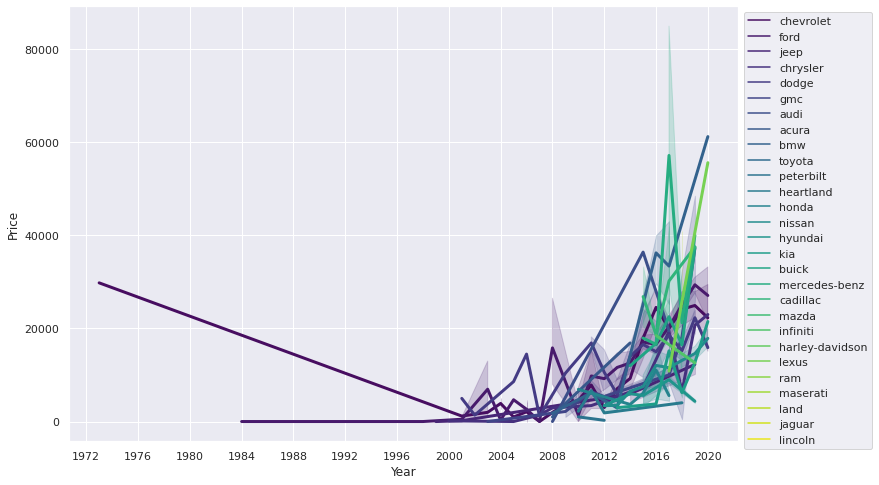

In [ ]:
#Visualization 1
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12, 8)})
ax = sns.lineplot(data = t_db2, x = 'year', y = 'price', hue = 'brand', palette = 'viridis', legend = 'full', lw = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

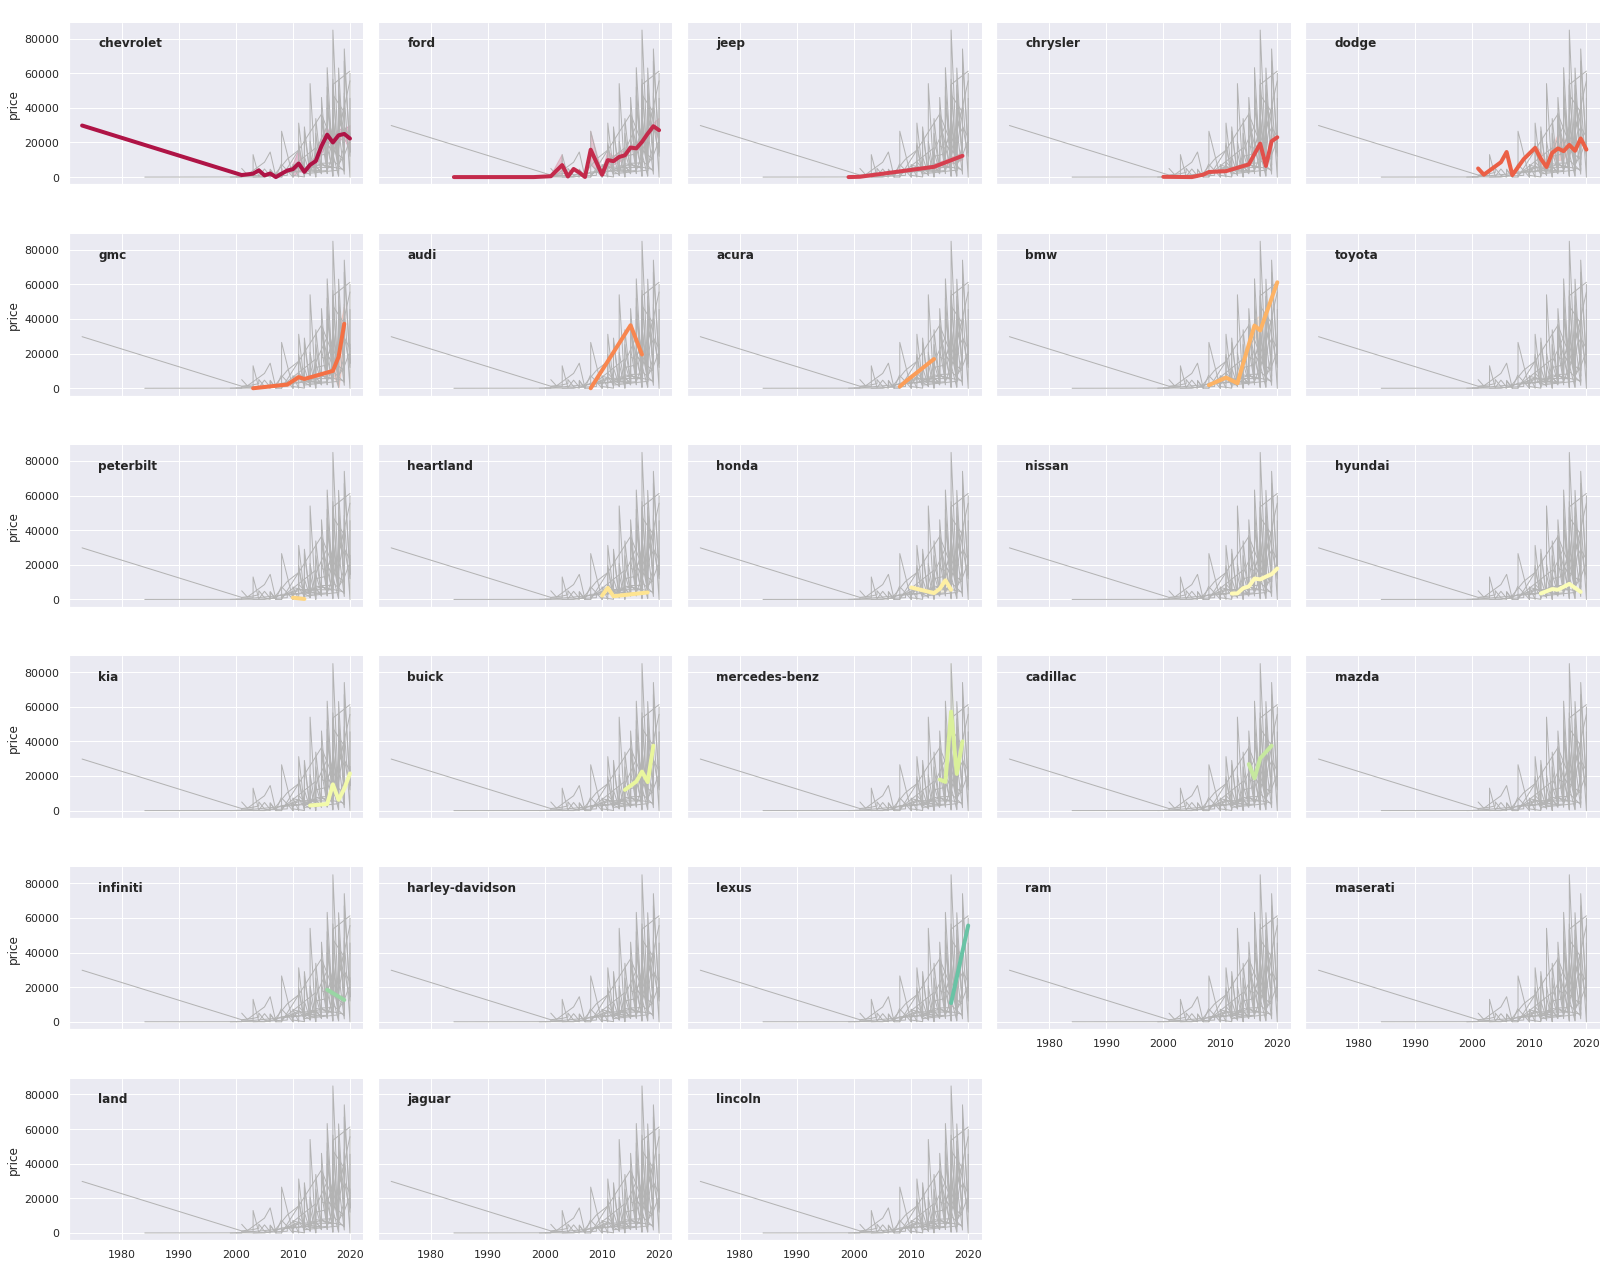

In [ ]:
#Visualization 3
g = sns.relplot(data = t_db2, x = 'year', y = 'price', col = 'brand', hue = 'brand',
                kind = 'line', palette = 'Spectral', linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False)

for time, ax in g.axes_dict.items():
  ax.text(0.1, 0.85, time, transform = ax.transAxes, fontweight = 'bold')
  sns.lineplot(data = t_db2, x = 'year', y = 'price', units = 'brand', 
               estimator = None, color = '0.7', linewidth = 1, ax = ax)
  g.set_titles(' ')
  g.set_axis_labels('', 'price')
  g.tight_layout

plt.show()

#Gray lines/diagrams are the other districts

In [ ]:
t_db2.sort_values(
    by="price",
    ascending=False
)

mileage          lot
year price brand                               
2017 84900 mercedes-benz   25302.0  167607883.0
2019 74000 ford            10536.0  167780682.0
     70000 ford             9643.0  167780680.0
     67000 dodge           10944.0  167759490.0
     65500 ford             6500.0  167718954.0
...                            ...          ...
2008 25    chevrolet      130623.0  167650817.0
1984 25    ford            41577.0  167611661.0
2010 25    chevrolet      149189.0  167650663.0
           ford           176919.0  167360230.0
2020 25    chevrolet        7232.0  167756877.0

[1848 rows x 2 columns]

#Geospatial

In [ ]:
geo_db = db
geo_db.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
geo_db.state.unique()

array(['new jersey', 'tennessee', 'georgia', 'virginia', 'florida',
       'texas', 'california', 'north carolina', 'ohio', 'new york',
       'pennsylvania', 'south carolina', 'michigan', 'washington',
       'arizona', 'kentucky', 'massachusetts', 'nebraska', 'ontario',
       'missouri', 'minnesota', 'connecticut', 'arkansas', 'colorado',
       'illinois', 'mississippi', 'maryland', 'utah', 'wisconsin',
       'oklahoma', 'oregon', 'indiana', 'west virginia', 'nevada',
       'kansas', 'rhode island', 'louisiana', 'alabama', 'new mexico',
       'idaho', 'new hampshire', 'montana', 'vermont'], dtype=object)

In [ ]:
geo_db['state_code'] = geo_db['state'].map(
    {'new jersey' : 'NJ', 'tennessee' : 'TN', 'georgia' : 'GA', 'virginia' : 'VA', 'florida' : 'FL',
       'texas' : 'TX', 'california' : 'CA', 'north carolina' : 'NC', 'ohio' : 'OH', 'new york' : 'NY',
       'pennsylvania' : 'PA', 'south carolina' : 'SC', 'michigan' : 'MI', 'washington' : 'WA',
       'arizona' : 'AZ', 'kentucky' : 'KY', 'massachusetts' : 'MA', 'nebraska' : 'NE', 'ontario' : 'ON',
       'missouri' : 'MO', 'minnesota' : 'MN', 'connecticut' : 'CT', 'arkansas' : 'AR', 'colorado' : 'CO',
       'illinois' : 'IL', 'mississippi' : 'MS', 'maryland' : 'MD', 'utah' : 'UT', 'wisconsin' : 'WI',
       'oklahoma' : 'OK', 'oregon' : 'OR', 'indiana' : 'IN', 'west virginia' : 'WV', 'nevada' : 'NV',
       'kansas' : 'KS', 'rhode island' : 'RI', 'louisiana' : 'LA', 'alabama' : 'AL', 'new mexico' : 'NM',
       'idaho' : 'ID', 'new hampshire' : 'NH', 'montana' : 'MT', 'vermont' : 'VT'})

<ipython-input-13-4ed1d3b0b378>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
geo_db

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,state_code
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,NJ
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,TN
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,GA
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,VA
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left,CA
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left,FL
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left,FL
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left,FL


In [ ]:
geo1 = px.choropleth(data_frame=geo_db, lat=None, lon=None, locations='state_code', locationmode='USA-states', geojson=None,
                     color='brand', scope='usa', center=None, title='Popular Brands per State', width=None, height=None)
geo1.show()

## Proportional Symbol Map Visualization

In [ ]:
# Relationship between Price and Brand and Mileage
geo_db2 = geo_db.groupby(['year','state_code']).mean()
geo_db2 = geo_db2[['price']].reset_index()
geo_db2

,year,state_code,price
0,1973,PA,29800.000000
1,1984,AR,25.000000
2,1994,GA,25.000000
3,1998,AR,25.000000
4,1999,FL,25.000000
...,...,...,...
310,2020,NV,24266.666667
311,2020,OH,29060.000000
312,2020,PA,18116.666667
313,2020,SC,32500.000000


In [ ]:
geo2 = px.scatter_geo(data_frame=geo_db2, lat=None, lon=None, locations='state_code', locationmode='USA-states', geojson=None,
 featureidkey=None, color='price', text=None, symbol=None, facet_row=None, facet_col=None,
 facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None,
 hover_data=None, custom_data=None, size='price', animation_frame=None,
 animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None,
 color_discrete_map=None, color_continuous_scale=None, range_color=None,
 color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, size_max=None,
 projection=None, scope='usa', center=None, fitbounds=None, basemap_visible=None,
 title=None, template=None, width=None, height=None)

In [ ]:
geo2.show()

#Network

In [ ]:
# data taken from https://www.kaggle.com/datasets/crailtap/street-network-of-new-york-in-graphml?resource=download
# mainly using street network of manhattan since New York road network is too big of a dataset
G = nx.read_graphml('/content/manhatten.graphml')

In [ ]:
nodes_list = list(G.nodes)
first = [nodes_list[i] for i in (0,1,2,3,4)]
last = [nodes_list[i] for i in (-1,-2,-3,-4,-5)]

In [ ]:
edges_list = list(G.edges)
first = [edges_list[i] for i in (0,1,2,3,4)]
last = [edges_list[i] for i in (-1,-2,-3,-4,-5)]

In [ ]:
# Output the Degree of Each Node
frequencies = G.degree
print(sorted(
    frequencies, 
    key=lambda x: x[1]
))

[('1431790464', 1), ('486876216', 1), ('3275488123', 1), ('42449846', 1), ('4158752889', 1), ('4158752891', 1), ('2567558468', 1), ('2089938148', 1), ('2089938149', 1), ('1773055862', 1), ('486859044', 1), ('371225085', 1), ('276032821', 1), ('3931534870', 1), ('3931534871', 1), ('486864450', 1), ('4158789503', 1), ('42456979', 1), ('371037077', 1), ('588785633', 1), ('486849242', 1), ('3275488110', 1), ('588938282', 1), ('42422207', 1), ('42434915', 2), ('42459579', 2), ('42445563', 2), ('42459636', 2), ('60924412', 2), ('1989931095', 2), ('42443621', 2), ('371188750', 2), ('42432722', 2), ('61261100', 2), ('42435988', 2), ('42435993', 2), ('1203709420', 2), ('371197453', 2), ('370927297', 2), ('3718637426', 2), ('595462053', 2), ('371337150', 2), ('1795811317', 2), ('371337269', 2), ('371206271', 2), ('371206272', 2), ('371206274', 2), ('42453156', 2), ('4139510037', 2), ('42436949', 2), ('1228990859', 2), ('371321235', 2), ('42437119', 2), ('246909446', 2), ('60918318', 2), ('355173

In [ ]:
str(first)

"[('42459137', '42447105', 0), ('42459137', '42438490', 0), ('42459137', '596776089', 0), ('1773060099', '1773055865', 0), ('1773060099', '588455742', 0)]"

In [ ]:
str(last)

"[('42434559', '1205714910', 0), ('42434559', '42434722', 0), ('373268478', '373268484', 0), ('373268478', '247221417', 0), ('42442745', '42442750', 0)]"

In [ ]:
print(len(nodes_list))

4426


In [ ]:
print(len(edges_list))

9626


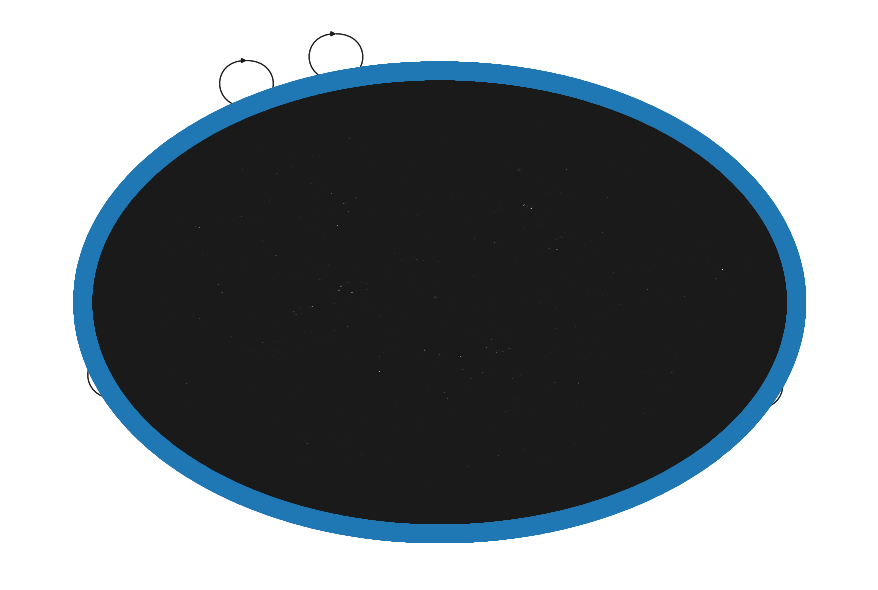

In [ ]:
nx.draw(G, pos=nx.circular_layout(G))

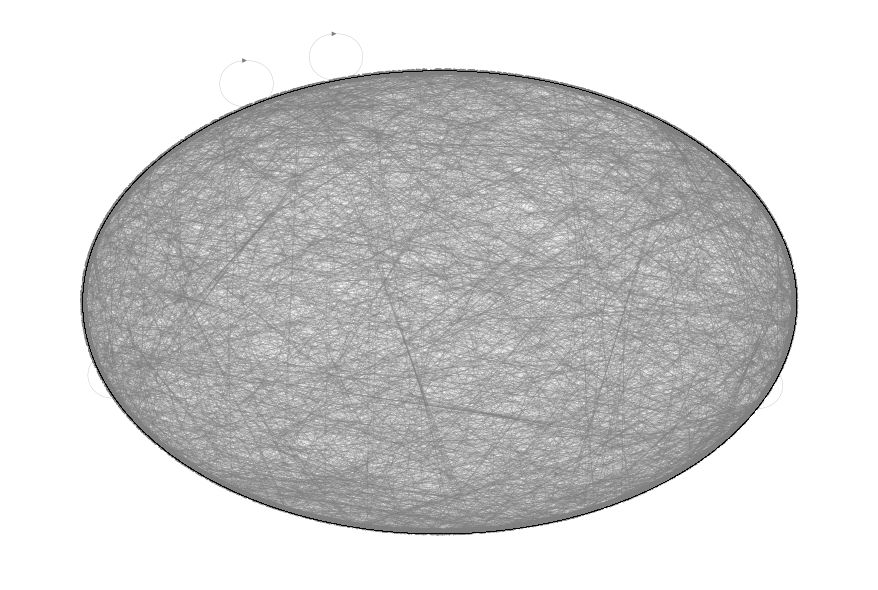

In [ ]:
options = {
    "node_color": "black",
    "node_size": 1,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw_circular(G, **options)
plt.show()

In [ ]:
# Output the Degree of Each Node
frequencies = G.degree
print(sorted(
    frequencies, 
    key=lambda x: x[1]
))

[('1431790464', 1), ('486876216', 1), ('3275488123', 1), ('42449846', 1), ('4158752889', 1), ('4158752891', 1), ('2567558468', 1), ('2089938148', 1), ('2089938149', 1), ('1773055862', 1), ('486859044', 1), ('371225085', 1), ('276032821', 1), ('3931534870', 1), ('3931534871', 1), ('486864450', 1), ('4158789503', 1), ('42456979', 1), ('371037077', 1), ('588785633', 1), ('486849242', 1), ('3275488110', 1), ('588938282', 1), ('42422207', 1), ('42434915', 2), ('42459579', 2), ('42445563', 2), ('42459636', 2), ('60924412', 2), ('1989931095', 2), ('42443621', 2), ('371188750', 2), ('42432722', 2), ('61261100', 2), ('42435988', 2), ('42435993', 2), ('1203709420', 2), ('371197453', 2), ('370927297', 2), ('3718637426', 2), ('595462053', 2), ('371337150', 2), ('1795811317', 2), ('371337269', 2), ('371206271', 2), ('371206272', 2), ('371206274', 2), ('42453156', 2), ('4139510037', 2), ('42436949', 2), ('1228990859', 2), ('371321235', 2), ('42437119', 2), ('246909446', 2), ('60918318', 2), ('355173

#Hierarchical

In [ ]:
h_db = db
h_db['constant'] = 1
h_db.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,constant
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,New jersey,usa,10 days left,1
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,Tennessee,usa,6 days left,1
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,Georgia,usa,2 days left,1
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,Virginia,usa,22 hours left,1
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,Florida,usa,22 hours left,1


In [ ]:
sb = px.sunburst(data_frame=h_db, names=None, values=h_db['constant'], parents=None, path=['brand', 'model'], ids=None, color=None, 
                 color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, color_discrete_sequence=None, color_discrete_map=None, hover_name=None, 
                 hover_data=None, custom_data=None, labels=None, title=None, template=None, width=None, height=None, branchvalues=None, maxdepth=None)

sb.show()